In [28]:
import numpy as np

In [168]:
data_1 = [
    [4,1],
    [2,4],
    [2,3],
    [3,6],
    [4,4],
]


data_2 = [
    [9,10],
    [6,8],
    [9,5],
    [8,7],
    [10,8],
]

In [169]:
x1 = np.array(data_1)
x2 = np.array(data_2)

In [170]:
u1 = x1.mean(0)
u2 = x2.mean(0)
print(u1)
print(u2)

[3.  3.6]
[8.4 7.6]


# 그래프 그리기

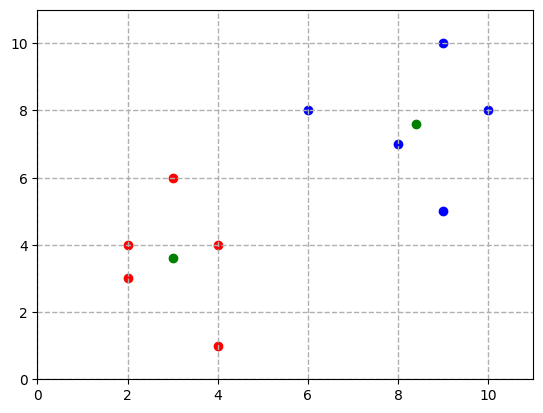

In [171]:
import matplotlib.pyplot as plt
# x1과 x2의 최소값과 최대값 계산
min_x = min(0, 11)
max_x = max(0, 11)

# 축 범위 설정
plt.xlim(min_x, max_x)
plt.ylim(min_x, max_x)
plt.scatter(x1[:,0], x1[:,1], color="r")
plt.scatter(x2[:,0], x2[:,1], color="b")
plt.scatter(u1[0], u1[1], color="g")
plt.scatter(u2[0], u2[1], color="g")

plt.grid(True, linestyle='--', linewidth=1)
plt.show()

# Scatter_W 구하기

In [172]:
s1 = np.cov((x1 - u1), bias=True, rowvar=False)
s2 = np.cov((x2 - u2), bias=True, rowvar=False)

In [173]:
s_w = s1 + s2
print(s_w)

[[ 2.64 -0.44]
 [-0.44  5.28]]


In [174]:
u12 = (u1 - u2).reshape(-1, 1)

In [175]:
s_b = u12 @ u12.T
s_b

array([[29.16, 21.6 ],
       [21.6 , 16.  ]])

In [176]:
s_w

array([[ 2.64, -0.44],
       [-0.44,  5.28]])

In [177]:
import numpy as np
inverse = np.linalg.inv(s_w) @ s_b

In [178]:
np.linalg.eig(inverse)

EigResult(eigenvalues=array([1.56568502e+01, 8.88178420e-16]), eigenvectors=array([[ 0.91955932, -0.59522755],
       [ 0.39295122,  0.80355719]]))

In [179]:
from preprocessing import get_eigen_vectors
value, vector = get_eigen_vectors(inverse)

In [180]:
x1 @ vector[0]

array([ 3.08300972, -0.54179157,  0.05343598, -0.81268735,  1.29732707])

In [196]:
print(x1)

[[4 1]
 [2 4]
 [2 3]
 [3 6]
 [4 4]]


In [204]:
aka = x1 @ vector[:,0].reshape(-1, 1)
aka

array([[4.07118849],
       [3.41092352],
       [3.0179723 ],
       [5.11638527],
       [5.25004215]])

In [205]:
aka2 = x2 @ vector[:,0].reshape(-1, 1)
aka2

array([[12.20554606],
       [ 8.66096567],
       [10.24078996],
       [10.10713308],
       [12.33920294]])

# 다중 분류

In [121]:
data_1 = [
    [4,1],
    [2,4],
    [2,3],
    [3,6],
    [4,4],
]


data_2 = [
    [9,10],
    [6,8],
    [9,5],
    [8,7],
    [10,8],
]

data_3 = [
    [15, 17],
    [13, 13],
    [16, 15],
    [14, 19],
    [14, 14],
]

In [122]:
x3 = np.array(data_3)

In [123]:
u1 = x1.mean(0)
u2 = x2.mean(0)
u3 = x3.mean(0)
print(u1)
print(u2)
print(u3)

[3.  3.6]
[8.4 7.6]
[14.4 15.6]


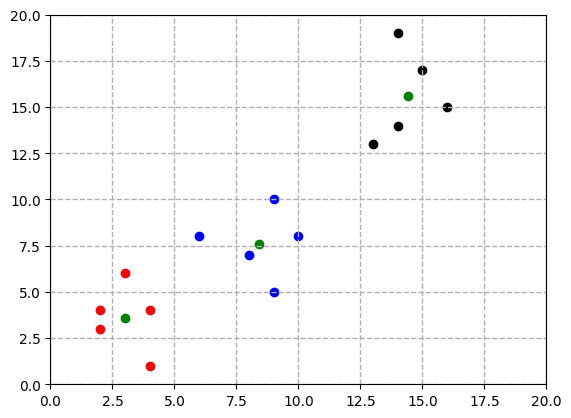

In [124]:
import matplotlib.pyplot as plt
# x1과 x2의 최소값과 최대값 계산
min_x = min(0, 20)
max_x = max(0, 20)

# 축 범위 설정
plt.xlim(min_x, max_x)
plt.ylim(min_x, max_x)
plt.scatter(x1[:,0], x1[:,1], color="r")
plt.scatter(x2[:,0], x2[:,1], color="b")
plt.scatter(x3[:,0], x3[:,1], color="k")
plt.scatter(u1[0], u1[1], color="g")
plt.scatter(u2[0], u2[1], color="g")
plt.scatter(u3[0], u3[1], color="g")
            

plt.grid(True, linestyle='--', linewidth=1)
plt.show()

In [128]:
s1 = np.cov((x1 - u1), bias=True, rowvar=False)
s2 = np.cov((x2 - u2), bias=True, rowvar=False)
s3 = np.cov((x3 - u3), bias=True, rowvar=False)

In [129]:
s_w = s1 + s2 + s3

In [132]:
s_w

array([[3.68, 0.12],
       [0.12, 9.92]])

In [149]:
u = (x1 + x2 + x3).sum(axis=0) / 25
# ((u1 * 5) + (u2 * 5) + (u3 * 5)) / 25


In [157]:
u_s = (u1 - u).reshape(-1 ,1)

In [160]:
a = (u_s @ u_s.T) / 5

In [161]:
a

array([[0.93312, 0.76032],
       [0.76032, 0.61952]])

[[4 1]
 [2 4]
 [2 3]
 [3 6]
 [4 4]] 
 [[ 9 10]
 [ 6  8]
 [ 9  5]
 [ 8  7]
 [10  8]]


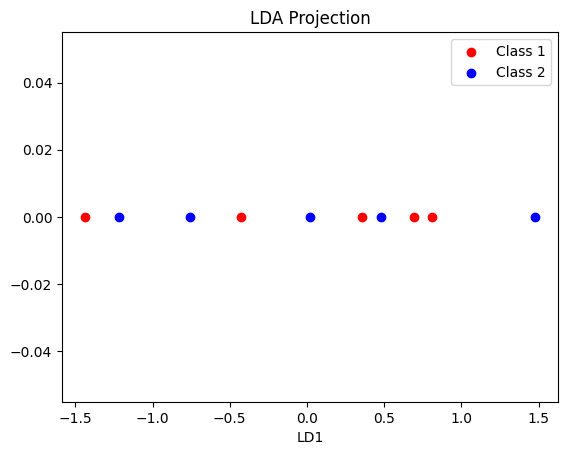

In [191]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA 모델 초기화
lda = LDA(n_components=1)  # 투영할 차원 수를 1로 설정
print(x1, "\n", x2)
# 데이터에 모델 적용
x_combined = np.vstack(((x1 - u1), (x2-u2)))  
y_combined = np.hstack((np.zeros(len(x1)), np.ones(len(x2))))  # 클래스 레이블 생성

lda.fit(x_combined, y_combined)

x_lda = lda.transform(x_combined)

# 투영된 데이터 플로팅
plt.scatter(x_lda[y_combined == 0], np.zeros(len(x1)), color='r', label='Class 1')
plt.scatter(x_lda[y_combined == 1], np.zeros(len(x2)), color='b', label='Class 2')
plt.legend()
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.show()

In [192]:
lda.scalings_

array([[-0.55997606],
       [ 0.33859018]])

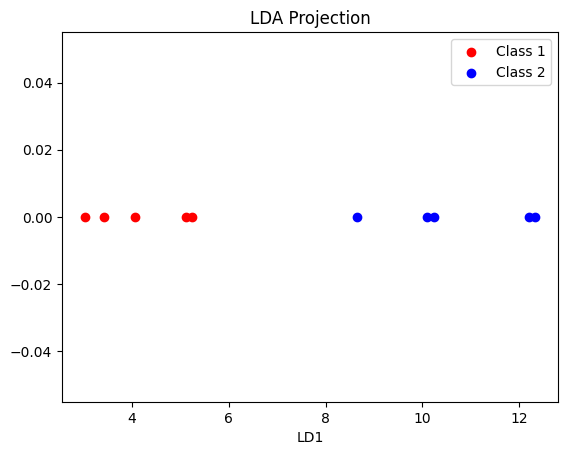

In [206]:
plt.scatter(aka, np.zeros(len(x1)), color='r', label='Class 1')
plt.scatter(aka2, np.zeros(len(x2)), color='b', label='Class 2')
plt.legend()
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.show()

In [197]:
lda.coef_

array([[-1.95603954e-16,  1.18272158e-16]])